# Titanic: Data Analysis and Survival Predictions

The Titanic disaster of **1912** remains one of the most infamous tragedies in maritime history, making it a compelling dataset for data science enthusiasts and practitioners. In this notebook, I will explore the **Titanic dataset**, analyze key features, and apply data science techniques to uncover insights and predict survival outcomes.

## Goals of this Notebook

1. **Understand the Dataset**: Perform exploratory data analysis (EDA) to uncover patterns, trends, and relationships in the data.  
2. **Feature Engineering**: Transform raw data into meaningful features for predictive modeling.  
3. **Model Development**: Build, evaluate, and optimize machine learning models to predict passenger survival with accuracy.  
4. **Data Visualization**: Use visual storytelling to make findings intuitive and engaging.  

## Why the Titanic Dataset?

The Titanic dataset is a classic introduction to:  
- **Data cleaning**: Handling missing data, outliers, and inconsistent entries.  
- **Exploratory Data Analysis (EDA)**: Unveiling relationships between variables like age, gender, ticket class, and survival.  
- **Predictive Modeling**: Applying classification techniques to predict a binary outcome (survival: yes/no).  
- **Real-world relevance**: Tackling challenges often found in real-world datasets.  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from collections import Counter

pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


# Variable Description

| **Variable** | **Definition**                              | **Key**                                      |
|--------------|--------------------------------------------|---------------------------------------------|
| survival     | Survival                                   | 0 = No, 1 = Yes                             |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex          | Sex                                        | -                                           |
| Age          | Age in years                               | -                                           |
| sibsp        | # of siblings/spouses aboard the Titanic   | -                                           |
| parch        | # of parents/children aboard the Titanic   | -                                           |
| ticket       | Ticket number                              | -                                           |
| fare         | Passenger fare                             | -                                           |
| cabin        | Cabin number                               | -                                           |
| embarked     | Port of Embarkation                       | C = Cherbourg, Q = Queenstown, S = Southampton |

# Categorical Variables

In [6]:
def plot_bar(variable):
    # get feature
    var = train_df[variable]
    # count number of categorical variables 
    varValue = var.value_counts()
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

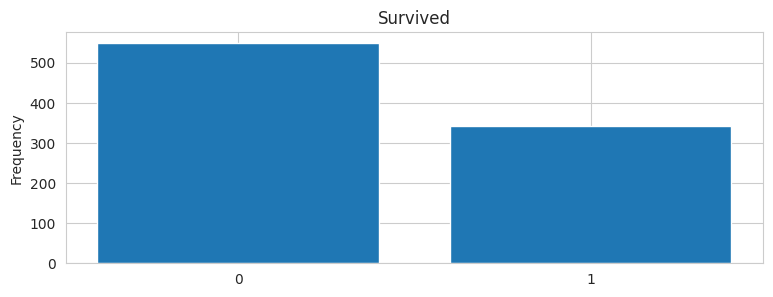

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


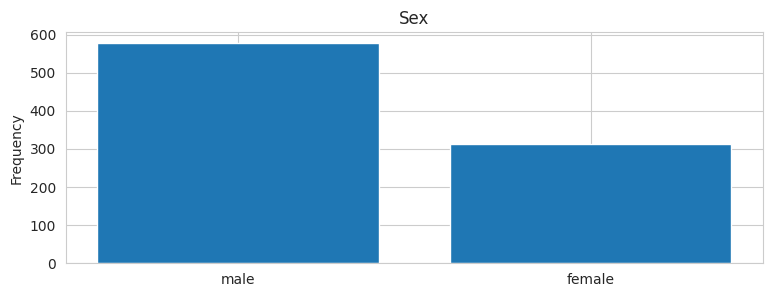

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


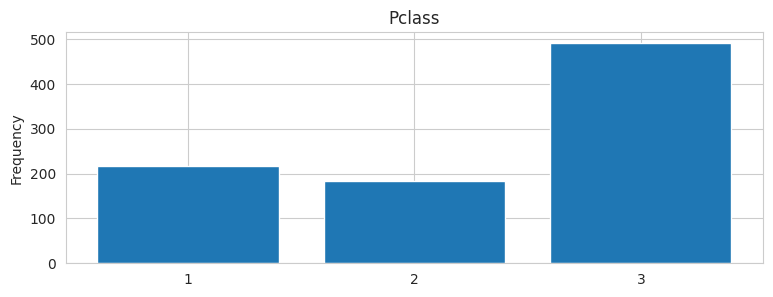

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


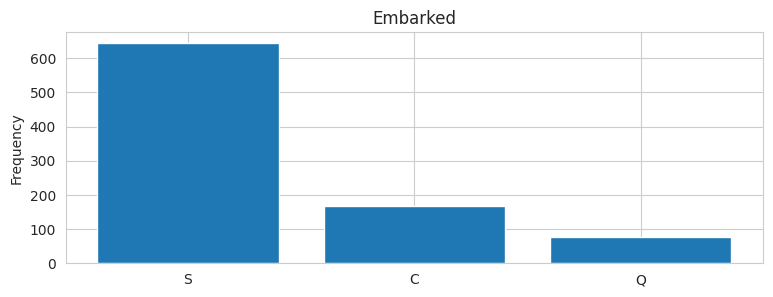

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


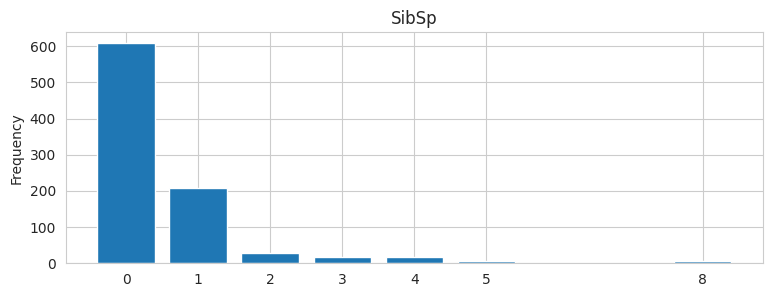

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


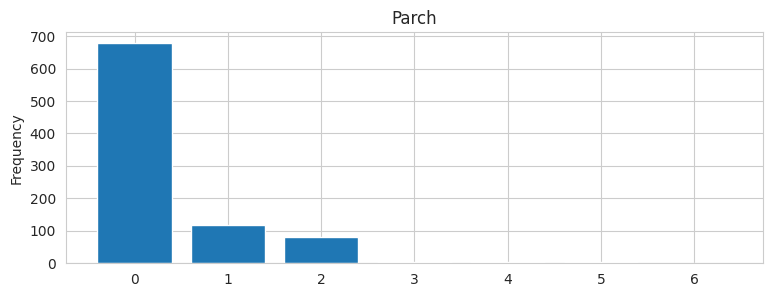

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [7]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for c in category1:
    plot_bar(c)

In [8]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{}".format(train_df[c].value_counts()))
    print("*"*50)

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64
**************************************************
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
**************************************************
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988      

# Numerical Variables

In [9]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

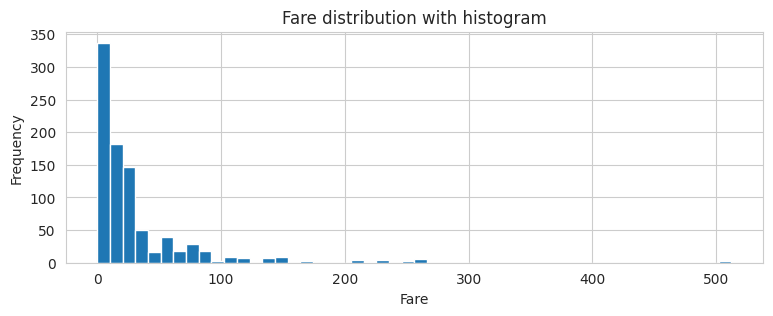

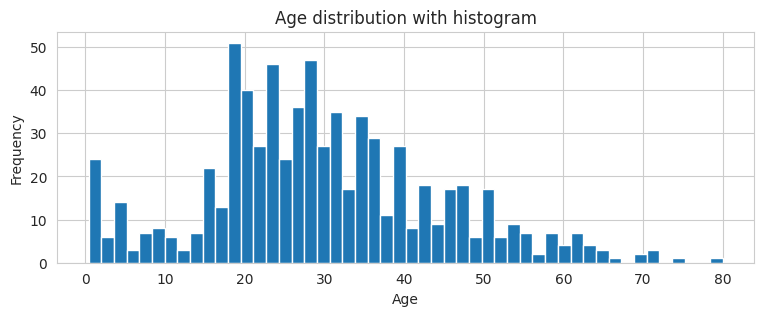

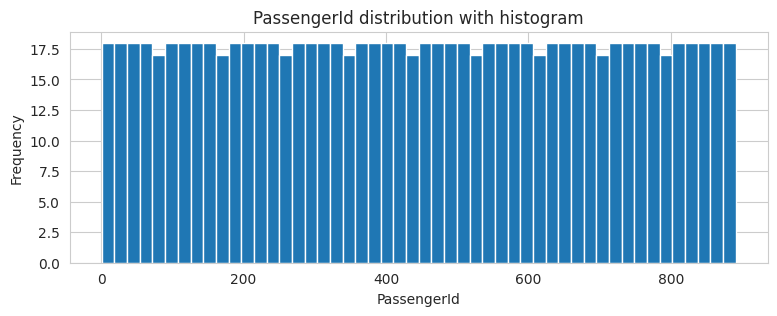

In [10]:
numericVar = ["Fare", "Age", "PassengerId"]

for n in numericVar:
    plot_hist(n)

# Basic Data Analysis

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived
* IsAdult - Survived

In [11]:
# Pclass vs Survived

train_df[["Pclass", "Survived"]].groupby(by="Pclass").mean()

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [12]:
# Sex vs Survived

train_df[["Sex", "Survived"]].groupby(by="Sex").mean()

,Survived
Sex,
female,0.74
male,0.19


# Adding a new feature to analyze survival rates between age groups

In [13]:
def is_adult(age):
    if age >= 18:
        return "Adult"
    else:
        return "Child"

train_df['IsAdult'] = train_df['Age'].apply(is_adult)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,Adult


In [14]:
# IsAdult vs Survived

train_df[["IsAdult", "Survived"]].groupby(by="IsAdult").mean()

,Survived
IsAdult,
Adult,0.38
Child,0.39


In [15]:
# Survival Percantage by Age Group

# Step 1: Calculate total counts for each group based on 'Survived' and 'IsAdult'
group_counts = train_df.groupby(['Survived', 'IsAdult'])['PassengerId'].count()

# Step 2: Calculate total counts for each survival group
total_counts = train_df.groupby(['Survived'])['PassengerId'].count()

# Step 3: Compute the percentage of each group
percentage_df = (group_counts / total_counts * 100).reset_index(name='Percentage')

# Display the percentage DataFrame
percentage_df

,Survived,IsAdult,Percentage
0,0,Adult,67.76
1,0,Child,32.24
2,1,Adult,66.96
3,1,Child,33.04


In [16]:
# Step 4: Prepare data for visualization by pivoting
pivot_df = percentage_df.pivot(index='Survived', columns='IsAdult', values='Percentage')

pivot_df

IsAdult,Adult,Child
Survived,,
0,67.76,32.24
1,66.96,33.04


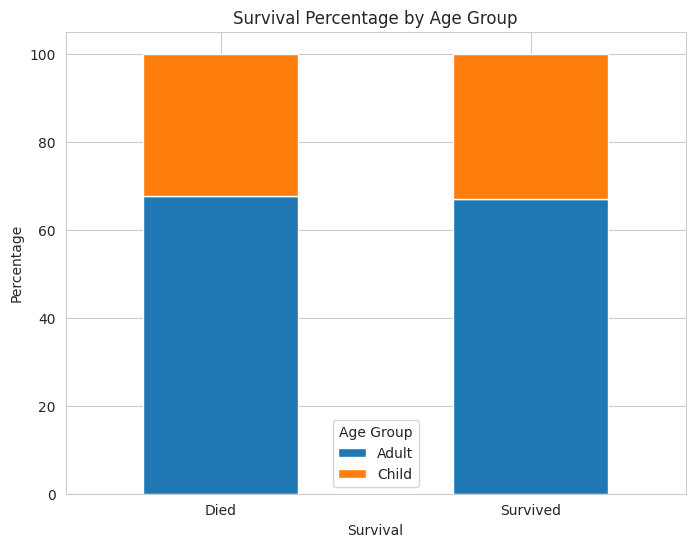

In [17]:
# Step 5: Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add chart title and labels
plt.title('Survival Percentage by Age Group')
plt.ylabel('Percentage')
plt.xlabel('Survival')
plt.xticks(ticks=[0, 1], labels=['Died', 'Survived'], rotation=0)
plt.legend(title='Age Group')

# Show the plot
plt.show()

In [18]:
# SibSp vs Survived
sibsp_survival = train_df[["SibSp", "Survived"]].groupby(by="SibSp", as_index = False).mean().sort_values(by="Survived", ascending=False)

sibsp_survival

,SibSp,Survived
1,1,0.54
2,2,0.46
0,0,0.35
3,3,0.25
4,4,0.17
5,5,0.00
6,8,0.00


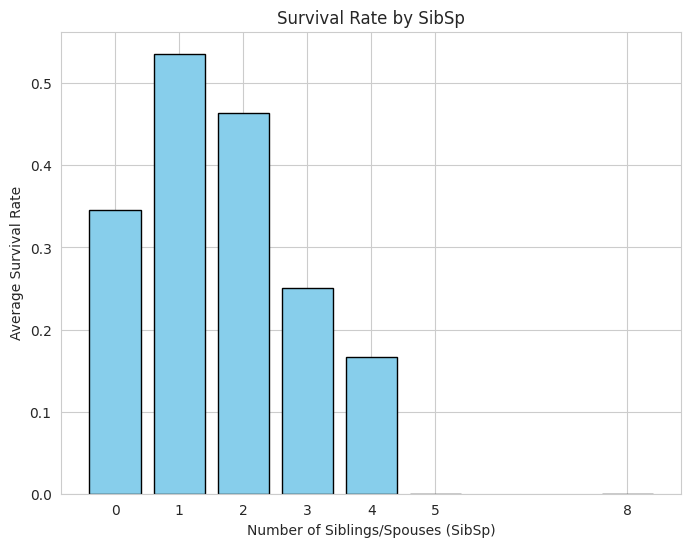

In [19]:
# Visualization
plt.figure(figsize=(8, 6))
plt.bar(sibsp_survival['SibSp'], sibsp_survival['Survived'], color='skyblue', edgecolor='black')

plt.title('Survival Rate by SibSp')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Average Survival Rate')
plt.xticks(sibsp_survival['SibSp'])
plt.show()

In [20]:
# Parch vs Survived
parch_survival = train_df[["Parch", "Survived"]].groupby(by="Parch", as_index = False).mean().sort_values(by="Survived", ascending=False)

parch_survival

,Parch,Survived
3,3,0.60
1,1,0.55
2,2,0.50
0,0,0.34
5,5,0.20
4,4,0.00
6,6,0.00


# Outlier Detection

In [21]:
def detect_outliers(df, features):
    outlier_indices = []
    for f in features:
        # 1st quartile
        Q1 = np.percentile(df[f], 25)
        # 2nd quartile
        Q3 = np.percentile(df[f], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = 1.5 * IQR
        # Detect Outliers and their indices
        outlier_list_col = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 1] # return indices for rows with more than 1 outliers
    
    return multiple_outliers

In [22]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S,Child
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.12,NaN,Q,Child
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.07,NaN,S,Child
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.00,C23 C25 C27,S,Adult
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.69,NaN,S,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.00,B96 B98,S,Child
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.00,1,1,12749,93.50,B69,S,Adult
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.00,1,1,PC 17756,83.16,E49,C,Adult
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.00,1,1,36928,164.87,NaN,S,Adult


In [23]:
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True)

In [24]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,Adult
806,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,Adult
807,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Child
808,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,Adult


# Missing Values
* Find Missing Values
* Fill Missing Values

In [25]:
df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [26]:
df['IsAdult'] = df['Age'].apply(is_adult)

## Find Missing Values

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,Adult
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,Adult
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Adult
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,Adult
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,Child
1224,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,Adult
1225,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,Adult
1226,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,Child


In [28]:
# Learning which columns have missing values
df.columns[df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            252
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          972
Embarked         2
IsAdult          0
dtype: int64

## Fill Missing Values
* Embark has 2 missing values
* Fare has 1 missing value

In [30]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
55,62,1.00,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN,Adult
754,830,1.00,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN,Adult


In [31]:
# Define the tolerance range (e.g., ±5 units)
tolerance = 5

# Rows with missing values in the 'Embarked' column
missing_embarked = df[df['Embarked'].isnull()]

for index, row in missing_embarked.iterrows():
    # Filter passengers with a similar Fare within the defined tolerance
    similar_fare_passengers = df[
        (df['Fare'] >= row['Fare'] - tolerance) & 
        (df['Fare'] <= row['Fare'] + tolerance) &
        (df['Embarked'].notnull())  # Ensure 'Embarked' is not null
    ]
    
    # If there are similar passengers, assign the mode of their 'Embarked' values
    if not similar_fare_passengers.empty:
        df.at[index, 'Embarked'] = similar_fare_passengers['Embarked'].mode()[0]
    else:
        print("Increase Tolerance!")

In [32]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult


In [33]:
empty_fare_passangers = df[df["Fare"].isnull()]

empty_fare_passangers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
962,1044,NaN,3,"Storey, Mr. Thomas",male,60.50,0,0,3701,NaN,NaN,S,Adult


In [34]:
for index, row in empty_fare_passangers.iterrows():
    mean_fare_by_pclass = np.mean(df[df.Pclass==row.Pclass].Fare)
    df.at[index, "Fare"] = mean_fare_by_pclass

In [35]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAdult
